## <center>AutoEncoders on Image Data</center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

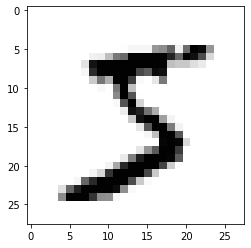

In [3]:
plt.imshow(X_train[0], cmap="Greys")

In [4]:
# Scaling the data
X_train = X_train/255
X_test = X_test/255

### Basic AutoEncoder

In this section, a stacked AutoEncoder will be built. The method for it's construction is the following:

- Start with the flattened image 28x28 --> 784
- Add layers with half of the neurons of the previous till reaching a small value 

In [5]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(784,activation="relu"))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [6]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [7]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=1.5),metrics=['accuracy'])
# In this case, binary crossentropy is used, it doesn't care about the different classes, 
# it cares about the outputed images, if they are the same as the ones inputed 

In [8]:
autoencoder.fit(
    X_train, X_train, # No y_train is needed, the model doesn´t care
    epochs=5,
    validation_data=[X_test, X_test] # N y_test needed, same as before
)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2553 - accuracy: 0.0818 - val_loss: 0.2253 - val_accuracy: 0.1107
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2042 - accuracy: 0.1394 - val_loss: 0.1837 - val_accuracy: 0.1604
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1721 - accuracy: 0.1798 - val_loss: 0.1580 - val_accuracy: 0.1951
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1544 - accuracy: 0.2046 - val_loss: 0.1464 - val_accuracy: 0.2100
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1443 - accuracy: 0.2188 - val_loss: 0.1391 - val_accuracy: 0.2194


1/1 [==============================] - 0s 147ms/step


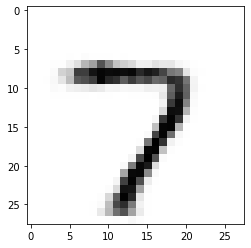

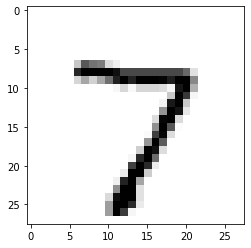

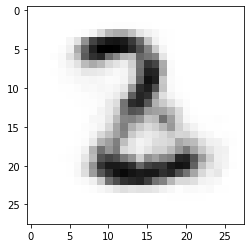

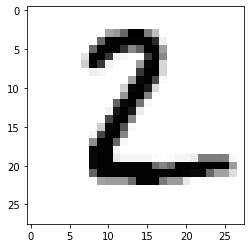

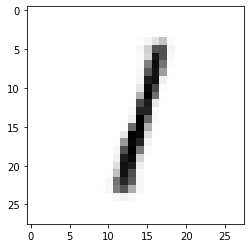

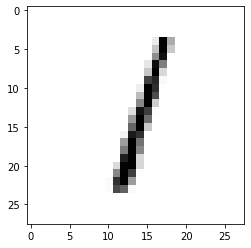

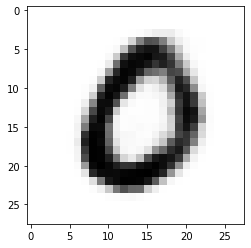

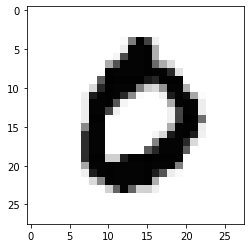

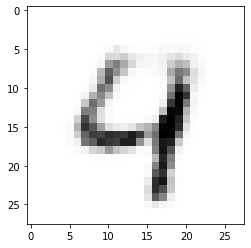

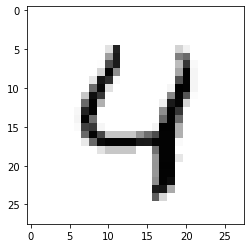

In [9]:
passed_images = autoencoder.predict(X_test[:10])

for i in range(5):
    plt.imshow(passed_images[i], cmap="Greys")
    plt.show()
    plt.imshow(X_test[i], cmap="Greys")
    plt.show()
    print()


From the images, the encoder seems to blur the images, however, it is spot on!!

### AutoEncoders for Denoising Images

In [10]:
from tensorflow.keras.layers import GaussianNoise # Library that can be added to the training data to make images noisier

In [11]:
sample = GaussianNoise(0.2) # value inside is a standard deviation, the bigger the value, the noisier
noisey = sample(X_test[0:2], training=True)

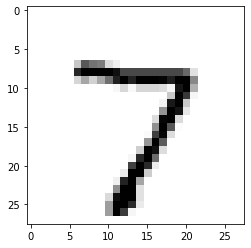

In [12]:
plt.imshow(X_test[0], cmap="Greys")

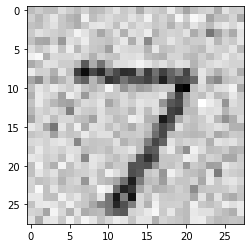

In [13]:
plt.imshow(noisey[0], cmap="Greys")

#### Create  noise removal autoencoder and train it.

In [14]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
# Add noise to images before going through autoencoder
encoder.add(GaussianNoise(0.2))

encoder.add(Dense(784,activation="relu"))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [15]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [16]:
noise_remover = Sequential([encoder, decoder])
noise_remover.compile(loss="binary_crossentropy", 
                      optimizer='adam',
                      metrics=['accuracy'])

In [17]:
noise_remover.fit(X_train, X_train, epochs=8,
                           validation_data=[X_test, X_test])

Epoch 1/8
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1741 - accuracy: 0.1775 - val_loss: 0.1414 - val_accuracy: 0.2182
Epoch 2/8
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1348 - accuracy: 0.2261 - val_loss: 0.1269 - val_accuracy: 0.2305
Epoch 3/8
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1248 - accuracy: 0.2398 - val_loss: 0.1198 - val_accuracy: 0.2433
Epoch 4/8
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1209 - accuracy: 0.2466 - val_loss: 0.1166 - val_accuracy: 0.2521
Epoch 5/8
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1183 - accuracy: 0.2519 - val_loss: 0.1135 - val_accuracy: 0.2536
Epoch 6/8
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1159 - accuracy: 0.2553 - val_loss: 0.1118 - val_accuracy: 0.2563
Epoch 7/8
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1140 - accuracy: 0.2585 - val_loss: 0.1110 - val_accuracy

In [19]:
ten_noisey_images = sample(X_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

The Original


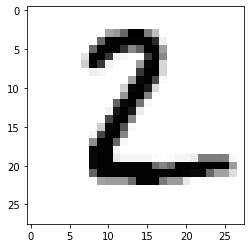

The Noisey Version


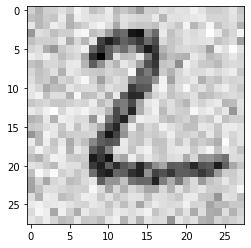

After going through denoiser


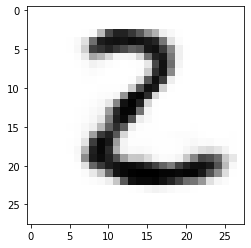

In [21]:
n = 1
print("The Original")
plt.imshow(X_test[n], cmap="Greys")
plt.show()
print("The Noisey Version")
plt.imshow(ten_noisey_images[n], cmap="Greys") # Double noise the one applied at the start, the other from the autoencoder
plt.show()
print("After going through denoiser")
plt.imshow(denoised[n], cmap="Greys")
plt.show()

The denoiser makes a great job, and performs very well when taking the reading the important data